## CMU16-745 Lecture 3 (2024)

File : minimization.ipynb

**Note :** For this example, df(x) and d2f(x) are scalar, so I cannot use solve(d2f(x0),df(x0)) in place of 
d2f(x0)\df(x0). Solve() requires matrix argument. Quick fix is I just use simple scalar division df(x0)/d2f(x0).

**Improvement :** Only the current step is marked with red x. The previous steps are in green. 

In [7]:
import numpy as np 
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt 


In [2]:
def f(x):
    return x**4 + x**3 -x**2 - x
    

In [4]:
def df(x):
    return 4.0*x**3 +3.0*x**2 - 2.0*x -1.0
    

In [5]:
def d2f(x):
    return 12.0*x**2 + 6.0*x -2.0
    

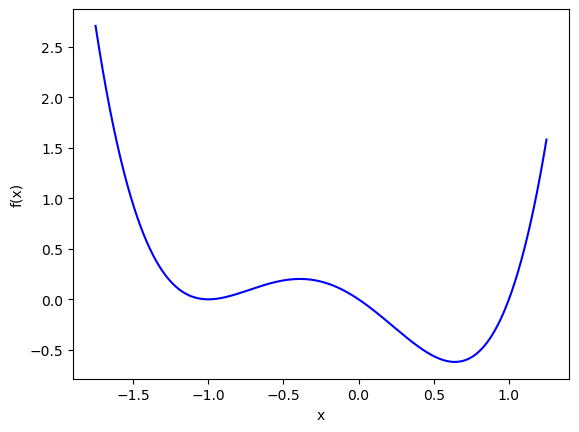

In [6]:
x = np.linspace(-1.75, 1.25, 1000)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


In [24]:
def newton_step(x0):
    #xn = x0 - solve(d2f(x0),df(x0))
    return x0 - df(x0)/d2f(x0)  # df() and d2f() are scalar in this example

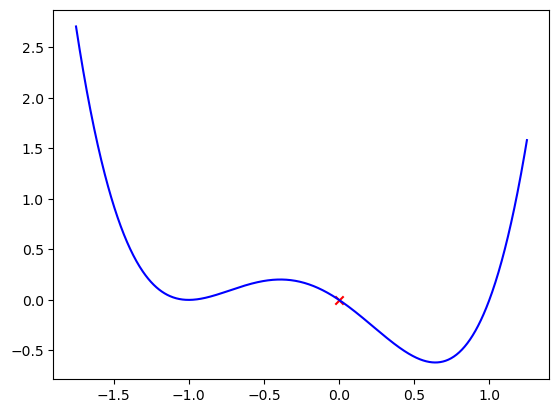

In [61]:
xguess = [0.0]
plt.figure()
plt.plot(x, f(x),'b')
plt.scatter(xguess, f(xguess[0]),marker='x',color='r')
plt.show()

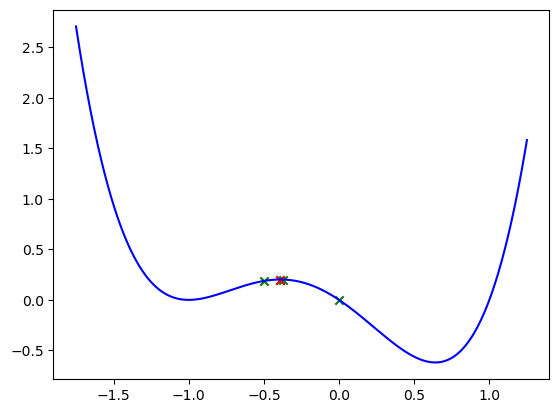

In [64]:
xnew = newton_step(xguess[-1])
xguess.append(xnew)
plt.figure()
plt.plot(x, f(x),'b')
xguess_array = np.array(xguess) # need to convert to array to pass as argument to f()
plt.scatter(xguess_array, f(xguess_array),marker='x',color='g')
plt.scatter(xguess_array[-1], f(xguess_array[-1]),marker='x',color='r')
plt.show()

In [65]:
# This function is also simplified for this example to use scalar H. 
# Posifive definite is replaced by positive.
def regularized_newton_step(x0):
    beta = 1.0
    H = d2f(x0)
    while H<= 0:  # if H is matrix, must test for positive definiteness
        H = H + beta

    xn = x0 - df(x0)/H
    return xn
    

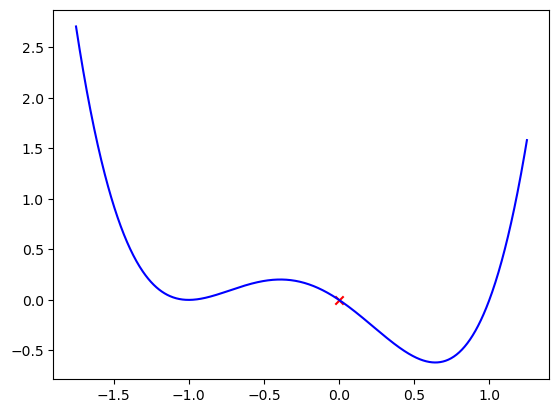

In [66]:
xguess = [0.0]
plt.figure()
plt.plot(x, f(x),'b')
plt.scatter(xguess, f(xguess[0]),marker='x',color='r')
plt.show()

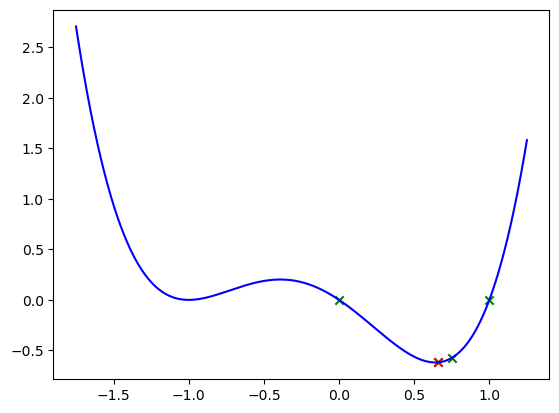

In [69]:
xnew = regularized_newton_step(xguess[-1])
xguess.append(xnew)
plt.figure()
plt.plot(x, f(x),'b')
xguess_array = np.array(xguess) # need to convert to array to pass as argument to f()
plt.scatter(xguess_array, f(xguess_array),marker='x',color='g')
plt.scatter(xguess_array[-1], f(xguess_array[-1]),marker='x',color='r')
plt.show()